## 210806 회의록

- 회의 목표  :  주제 선정 

- 주제 : 코로나 접종 현황에 따른 소비 패턴 변화!
- 전제 : 월 별 접종 현황을 나누고

- 전국 코로나 접종 현황 따른 변화 
  - 소비내역 분석
  - 이동량 변화 (카드내역, 대중교통, 통신사)
  - 확산 (대구/ 여름 / 연말 )  /  제 4차 확산  (백신차이)

In [787]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" 

In [788]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 1. 일일 접종현황 ~ 

In [789]:
vaccinated = pd.read_csv('./Data/owid-covid-data.csv')

In [790]:
vaccinated_kor = vaccinated[vaccinated['iso_code']=='KOR']

In [791]:
vaccinated_kor = vaccinated_kor.reset_index(drop=True)

In [792]:
vaccinated_kor = vaccinated_kor.loc[:,['date',
                      'people_vaccinated',
                      'people_fully_vaccinated']]

#nan값 처리
vaccinated_kor = vaccinated_kor.dropna()

In [793]:
#str형태 날짜 다루기 쉽게 int로 변경
date_list = []
for i in vaccinated_kor['date']:
    date = i.replace('-',"")
    date_list.append(date)

#날짜 column 추가
vaccinated_kor['date']=date_list

#column 순서 재조정
vaccinated_kor = vaccinated_kor.rename(columns={"date":'날짜',
                               "people_vaccinated":'전체접종',
                               "people_fully_vaccinated":'2차접종'})


In [794]:
#index 재조정"
vaccinated_kor = vaccinated_kor.reset_index(drop=True)

In [795]:
#1차 접종자 계산 후 column으로 추가
first_vc = vaccinated_kor['전체접종'] - vaccinated_kor['2차접종']

In [796]:
vaccinated_kor['1차접종'] = first_vc
vaccinated_kor = vaccinated_kor[['날짜','1차접종','2차접종','전체접종']]
#vaccinated_kor = vaccinated_kor.astype(int)
vaccinated_kor

,날짜,1차접종,2차접종,전체접종
0,20210320,681224.0,313.0,681537.0
1,20210321,680944.0,593.0,681537.0
2,20210322,684324.0,883.0,685207.0
3,20210323,705472.0,1498.0,706970.0
4,20210324,734784.0,2692.0,737476.0
...,...,...,...,...
139,20210806,13105480.0,7683371.0,20788851.0
140,20210807,13191006.0,7719219.0,20910225.0
141,20210808,13216416.0,7721457.0,20937873.0
142,20210809,13479011.0,7894715.0,21373726.0


In [797]:
vaccinated_kor[vaccinated_kor['날짜']=='20210526']

,날짜,1차접종,2차접종,전체접종
67,20210526,2016409.0,2017866.0,4034275.0


In [798]:
#접종률 데이터 프레임 생성

vaccinated_per = pd.DataFrame()
vaccinated_per['날짜'] = vaccinated_kor['날짜']
vaccinated_per['1차접종률'] = ((vaccinated_kor['1차접종']/51671569)*100).round(2)
vaccinated_per['2차접종률'] = ((vaccinated_kor['2차접종']/51671569)*100).round(2)


In [799]:

vaccinated_per[vaccinated_per['날짜']=='20210526']

,날짜,1차접종률,2차접종률
67,20210526,3.9,3.91


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, '접종일자')

Text(0, 0.5, '접종률')

([<matplotlib.axis.XTick at 0x20f62d3e580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

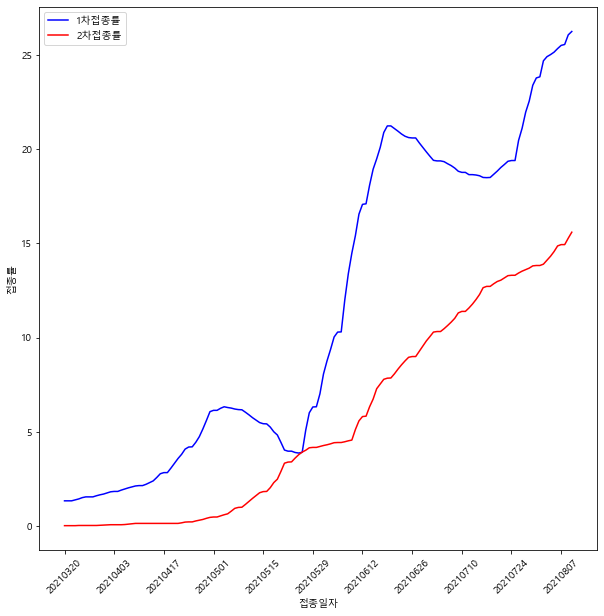

In [800]:
plt.figure(figsize=(10,10))
plt.plot(vaccinated_per['날짜'], vaccinated_per['1차접종률'], color='blue', label='1차접종률')
plt.plot(vaccinated_per['날짜'], vaccinated_per['2차접종률'], color='red',label='2차접종률')

plt.xlabel('접종일자')
plt.ylabel('접종률')
plt.xticks([vaccinated_kor['날짜'][14*i] for i in range(11)],rotation=45)
plt.legend(loc='best')

# 2. 해당월의 접종자 수 집계

In [826]:
vc_month = vaccinated_kor
vc_month = vc_month.drop('전체접종',axis=1)

In [827]:
vc_month['년'] = vc_month['날짜'].str[:4]
vc_month['월'] = vc_month['날짜'].str[4:]
vc_month['월'] = vc_month['월'].astype(int)

In [828]:
vc_month = vc_month.drop('날짜',axis=1)


In [829]:
vc_month1 = vc_month.drop('2차접종',axis=1)
vc_month2 = vc_month.drop('1차접종',axis=1)



In [830]:
vc_month1['차수'] = '1차'
vc_month2['차수'] = '2차'
vc_month1 = vc_month1.rename(columns={"1차접종":"접종자수"})
vc_month2 = vc_month2.rename(columns={"2차접종":"접종자수"})

In [831]:
vc_month2 = vc_month2[(vc_month2['월']==331) |
          (vc_month2['월']==430) |
          (vc_month2['월']==531) |
          (vc_month2['월']==630) |
          (vc_month2['월']==731) |
          (vc_month2['월']==810) ]
vc_month1 = vc_month1[(vc_month1['월']==331) |
          (vc_month1['월']==430) |
          (vc_month1['월']==531) |
          (vc_month1['월']==630) |
          (vc_month1['월']==731) |
          (vc_month1['월']==810) ]




In [832]:
vc_month1 = vc_month1.reset_index(drop=True)
vc_month2 = vc_month2.reset_index(drop=True)
vc_month1['월'] = vc_month1['월']//100
vc_month2['월'] = vc_month2['월']//100

In [833]:
vc_month2
vc_month1

,접종자수,년,월,차수
0,12977.0,2021,3,2차
1,228841.0,2021,4,2차
2,2174542.0,2021,5,2차
3,5073673.0,2021,6,2차
4,7147537.0,2021,7,2차
5,8062980.0,2021,8,2차


,접종자수,년,월,차수
0,866982.0,2021,3,1차
1,3133440.0,2021,4,1차
2,3622834.0,2021,5,1차
3,10266576.0,2021,6,1차
4,12299382.0,2021,7,1차
5,13572126.0,2021,8,1차


In [834]:
net_1 = [866982.0]
net_2 = [12977.0]
for i in range(6):
    try:
        net_1.append(vc_month1['접종자수'][i+1]-vc_month1['접종자수'][i])
        net_2.append(vc_month2['접종자수'][i+1]-vc_month2['접종자수'][i])
    except:
        pass
    
    

 

In [835]:
vc_month1['접종자수'] = net_1
vc_month2['접종자수'] = net_2


In [836]:
vc_concat = pd.concat([vc_month1,vc_month2])


vc_concat['접종자수'] = vc_concat['접종자수'].astype(int)

vc_concat



,접종자수,년,월,차수
0,866982,2021,3,1차
1,2266458,2021,4,1차
2,489394,2021,5,1차
3,6643742,2021,6,1차
4,2032806,2021,7,1차
5,1272744,2021,8,1차
0,12977,2021,3,2차
1,215864,2021,4,2차
2,1945701,2021,5,2차
3,2899131,2021,6,2차


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='월', ylabel='접종자수'>

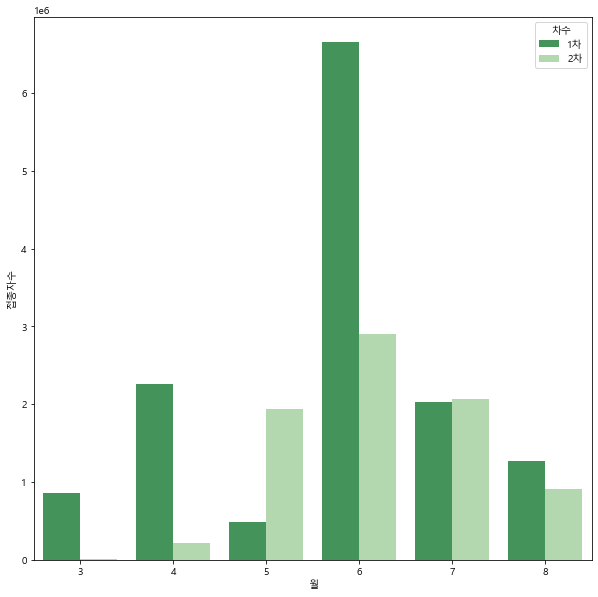

In [837]:
plt.figure(figsize = (10,10))

sns.barplot(x=vc_concat['월'],y=vc_concat['접종자수'],hue=vc_concat['차수'],palette='Greens_r')

<Figure size 720x720 with 0 Axes>

<BarContainer object of 144 artists>

<BarContainer object of 144 artists>

<BarContainer object of 144 artists>

Text(0.5, 0, '접종일자')

Text(0, 0.5, '접종률')

([<matplotlib.axis.XTick at 0x20f67243f40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

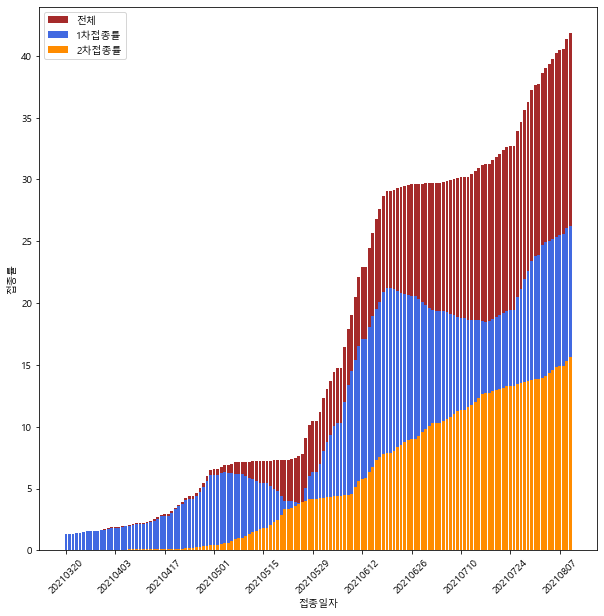

In [845]:
plt.figure(figsize=(10,10))

plt.bar(vaccinated_per['날짜'], vaccinated_per['1차접종률']+vaccinated_per['2차접종률'], color='brown', label='전체')
plt.bar(vaccinated_per['날짜'], vaccinated_per['1차접종률'], color='royalblue', label='1차접종률')
plt.bar(vaccinated_per['날짜'], vaccinated_per['2차접종률'], color='darkorange',label='2차접종률')



plt.xlabel('접종일자')
plt.ylabel('접종률')
plt.xticks([vaccinated_kor['날짜'][14*i] for i in range(11)],rotation=45)
plt.legend(loc='best')
